In [43]:
import numpy as np 


In [44]:
!ls

Names_indian.txt
README.md
names.txt
youtube-1-bigrams.ipynb
youtube-2-crossentropy.ipynb


In [45]:
words = open('Names_indian.txt', 'r').read().splitlines()
words2 = open('names.txt', 'r').read().splitlines()

In [46]:
words = words + words2

In [47]:
# temp = words
words = [w.lower() for w in words]
words[:3]

['aaban', 'sethuraman', 'eknath']

In [48]:
len(words)

87726

In [49]:
words[4200]

'balathevan'

In [50]:
min(len(w) for w in words)

2

In [51]:
max(len(w) for w in words)

25

In [52]:
# tokenizer 
chars = list(set(''.join(words)))
chars
stoi = {c:i for i,c in enumerate(chars)}

itos = {i:c for c,i in stoi.items()}

In [53]:
stoi

{'b': 0,
 'n': 1,
 'k': 2,
 '.': 3,
 'y': 4,
 'h': 5,
 'c': 6,
 'o': 7,
 'f': 8,
 'q': 9,
 'r': 10,
 'v': 11,
 'x': 12,
 'e': 13,
 'z': 14,
 'l': 15,
 'j': 16,
 's': 17,
 'm': 18,
 ' ': 19,
 't': 20,
 'u': 21,
 'g': 22,
 'i': 23,
 'a': 24,
 'p': 25,
 'd': 26,
 '-': 27,
 'w': 28}

In [54]:
itos

{0: 'b',
 1: 'n',
 2: 'k',
 3: '.',
 4: 'y',
 5: 'h',
 6: 'c',
 7: 'o',
 8: 'f',
 9: 'q',
 10: 'r',
 11: 'v',
 12: 'x',
 13: 'e',
 14: 'z',
 15: 'l',
 16: 'j',
 17: 's',
 18: 'm',
 19: ' ',
 20: 't',
 21: 'u',
 22: 'g',
 23: 'i',
 24: 'a',
 25: 'p',
 26: 'd',
 27: '-',
 28: 'w'}

In [55]:
string = "hello world"
string = "vivek"
ints = []
for c in string:
    ints.append(stoi[c])
print(ints)   

[11, 23, 11, 13, 2]


In [56]:
string = [24, 7, 24, 10, 16]
for i in string:
    
    print(itos[i])

a
o
a
r
j


In [57]:
# trigram
for w in words[:1]:
    chs = ['Start'] + list(w) + ['End']
    for ch1,ch2,ch3 in zip(chs,chs[1:],chs[2:]):
        print(ch1,ch2,ch3)
        
    
    
    

Start a a
a a b
a b a
b a n
a n End


In [58]:
# bigram
bigr = {} 
for w in words:
    chs = ['Start'] + list(w) + ['End']
    for ch1,ch2 in zip(chs,chs[1:]):
#         print(ch1,ch2)
        bigram = (ch1,ch2)
        bigr[bigram] = bigr.get(bigram,0) + 1
        
        

In [59]:
sorted(bigr.items(), key = lambda x: -x[1])

[(('a', 'n'), 31835),
 (('a', 'End'), 23357),
 (('h', 'a'), 20877),
 (('n', 'End'), 20542),
 (('t', 'h'), 16060),
 (('s', 'h'), 15949),
 (('a', 'r'), 14465),
 (('r', 'a'), 13328),
 (('i', 'End'), 11633),
 (('Start', 'a'), 11184),
 (('n', 'a'), 11184),
 (('y', 'a'), 9906),
 (('h', 'i'), 9089),
 (('n', 'i'), 8800),
 (('k', 'a'), 8551),
 (('m', 'a'), 8441),
 (('r', 'i'), 8232),
 (('i', 'n'), 7405),
 (('Start', 's'), 7376),
 (('l', 'a'), 7302),
 (('Start', 'k'), 7284),
 (('h', 'End'), 7074),
 (('v', 'a'), 6870),
 (('a', 's'), 6674),
 (('a', 'l'), 6557),
 (('Start', 'm'), 6497),
 (('a', 't'), 6031),
 (('i', 's'), 5767),
 (('e', 'n'), 5760),
 (('e', 'e'), 5681),
 (('a', 'm'), 5670),
 (('s', 'a'), 5579),
 (('i', 't'), 5520),
 (('v', 'i'), 5509),
 (('a', 'a'), 5166),
 (('Start', 'r'), 5082),
 (('e', 'End'), 5033),
 (('Start', 'j'), 4984),
 (('j', 'a'), 4936),
 (('a', 'y'), 4858),
 (('Start', 'd'), 4828),
 (('Start', 'n'), 4753),
 (('Start', 'v'), 4567),
 (('a', 'v'), 4550),
 (('e', 's'), 4436)

In [60]:
vocab_size = len(itos)
vocab_size

29

In [61]:
N = np.zeros((29,29), dtype = np.int32)
N.shape

(29, 29)

In [62]:
# create a probability distribution using the counts we got 
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
#         print(ch1,ch2)
#         print(ix1,ix2)
        N[ix1,ix2] += 1
    

In [63]:
N

array([[   75,    10,     0,   200,   125,  1415,     1,   230,     0,
            0,  1110,     0,     0,   955,     1,   115,     9,    15,
            0,     0,     8,   263,     1,  1167,  2162,     2,   105,
            1,     1],
       [  133,  2538,   666, 20542,  1244,    88,   376,  1041,    11,
            2,   151,   229,     6,  3160,   158,   207,   681,   859,
          252,    58,  3536,  1388,  1143,  8800, 11184,    82,  2824,
            1,    41],
       [    7,    65,   180,  1134,   461,   831,     9,   800,     1,
            0,   719,    12,     0,  1783,     4,   145,     3,  1469,
           25,    11,   193,  1134,     5,  1607,  8551,     5,     6,
            0,    36],
       [ 3147,  4753,  7284,     1,  2196,  2579,  2623,   607,   559,
          108,  5082,  4567,   135,  2240,  1056,  2949,  4984,  7376,
         6497,    10,  4249,   738,  2201,  1510, 11184,  3871,  4828,
            0,   404],
       [   32,  1931,   117,  3155,    55,    54,   120,

In [64]:
N[0] # representing counts of all chars which came after h

array([  75,   10,    0,  200,  125, 1415,    1,  230,    0,    0, 1110,
          0,    0,  955,    1,  115,    9,   15,    0,    0,    8,  263,
          1, 1167, 2162,    2,  105,    1,    1])

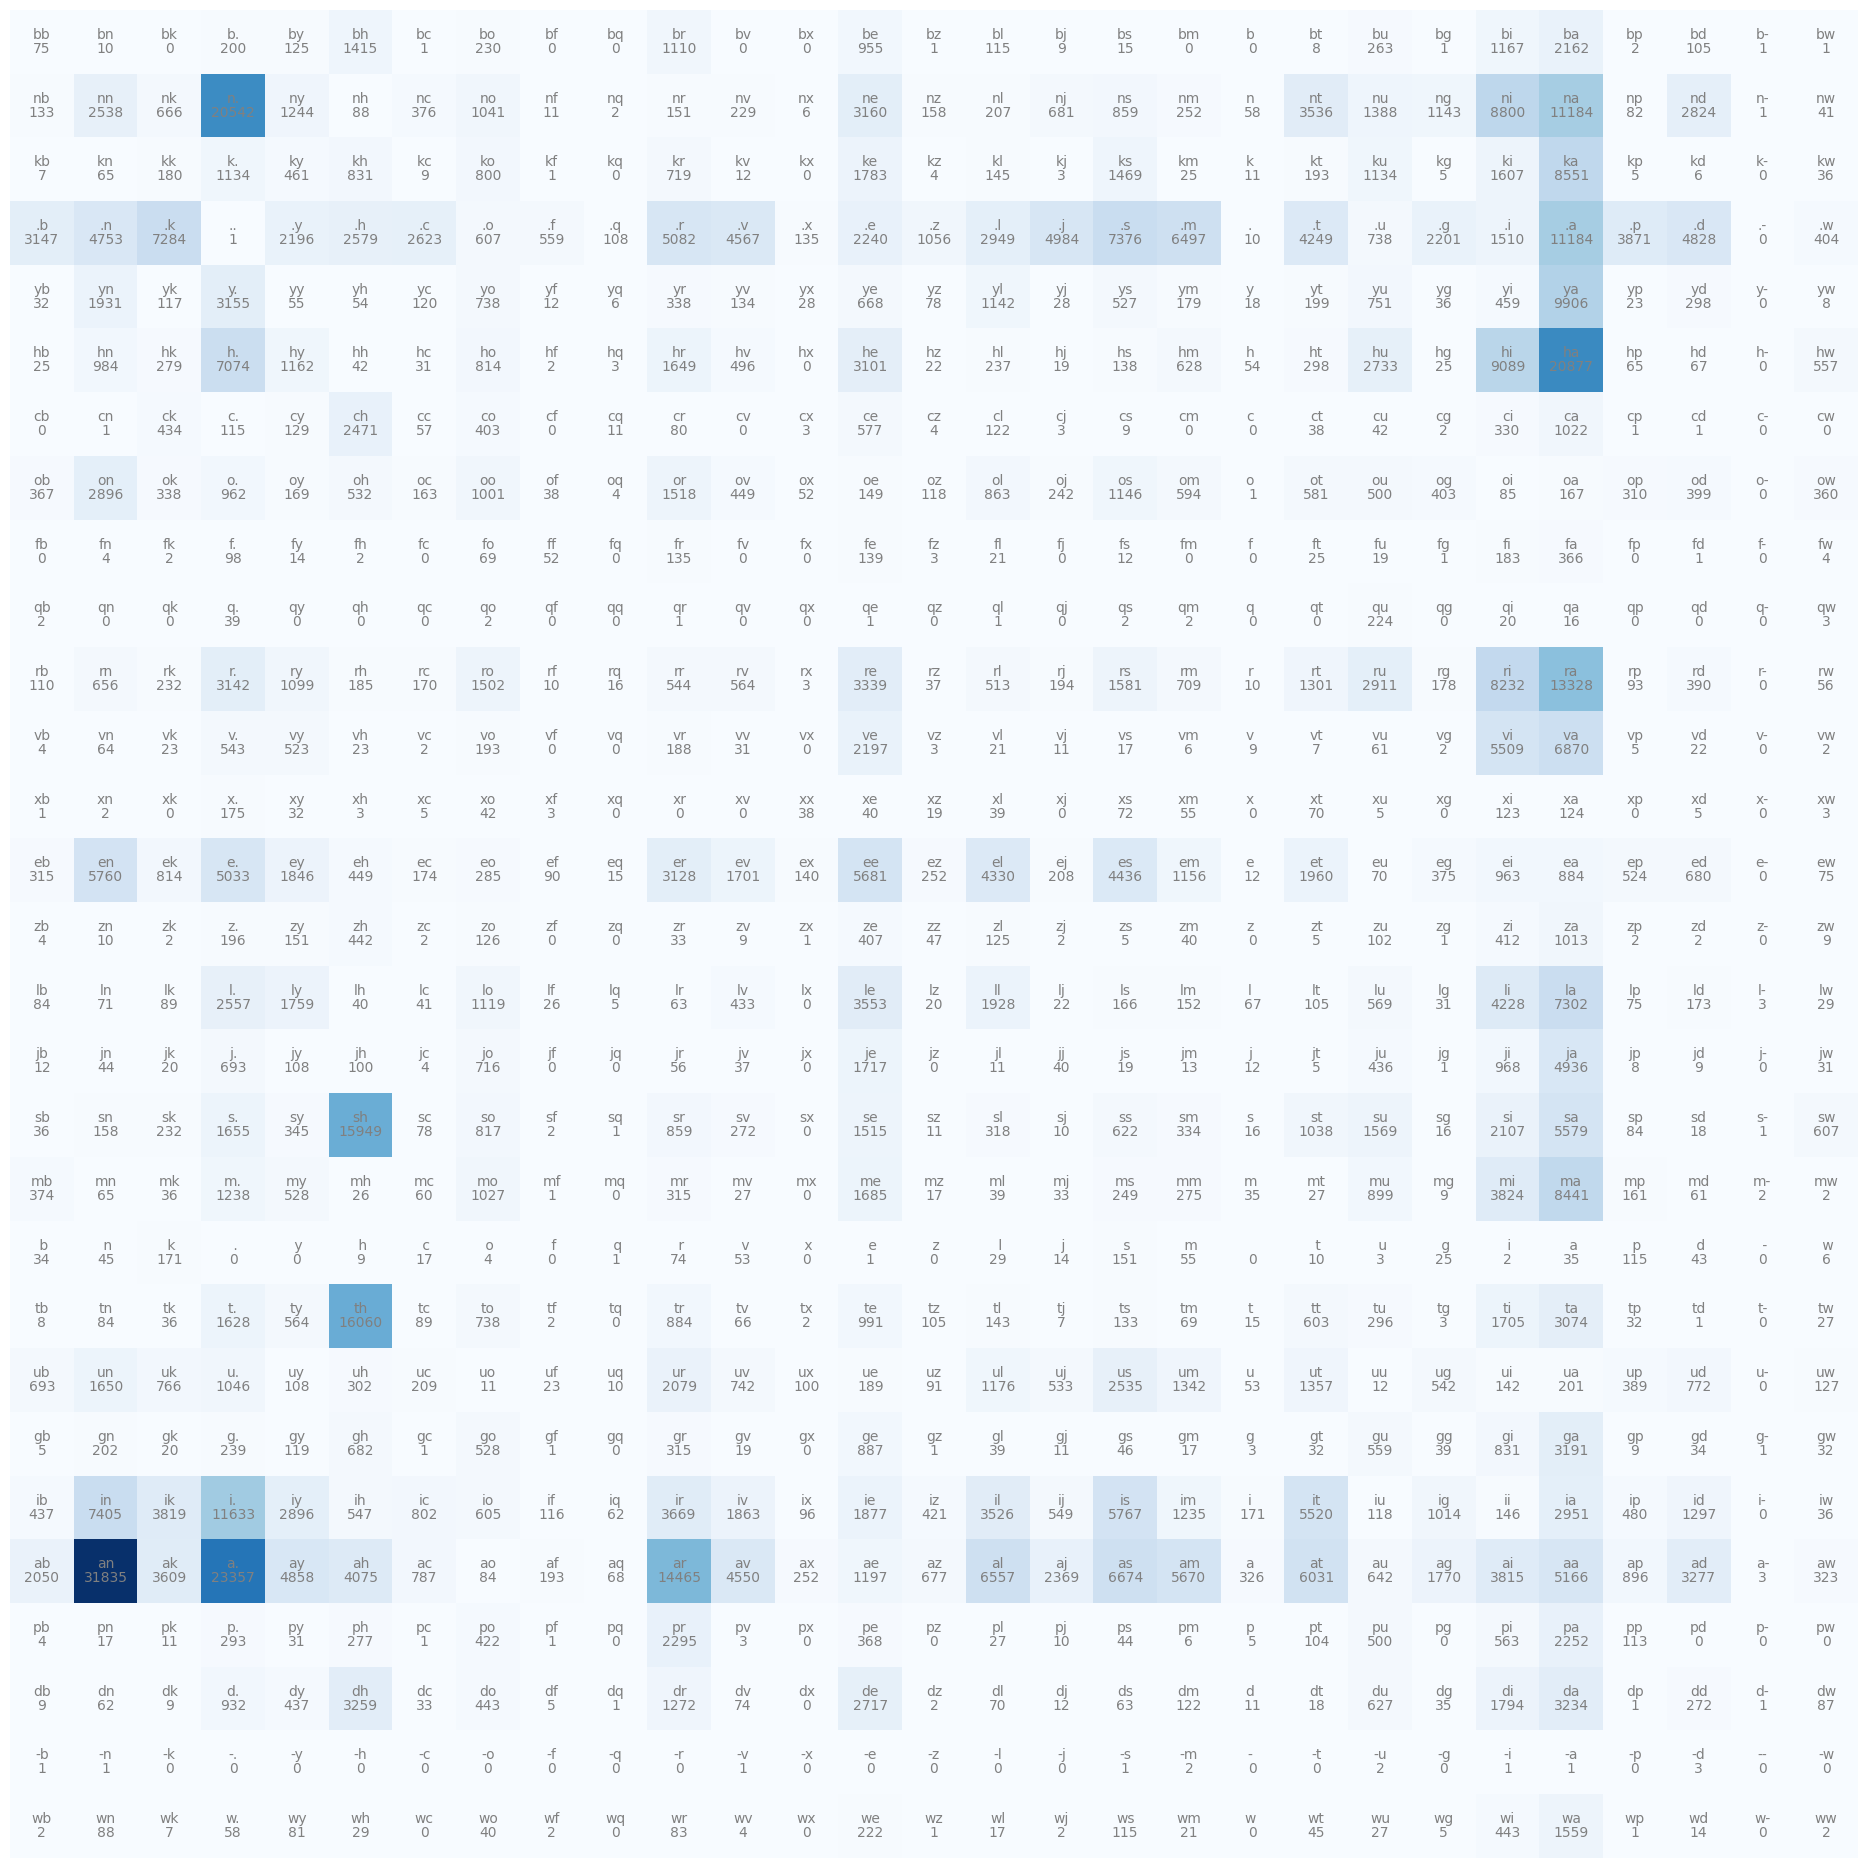

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(24,24))
plt.imshow(N, cmap='Blues')
for i in range(29):
    for j in range(29):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [66]:
N[0]

array([  75,   10,    0,  200,  125, 1415,    1,  230,    0,    0, 1110,
          0,    0,  955,    1,  115,    9,   15,    0,    0,    8,  263,
          1, 1167, 2162,    2,  105,    1,    1])

In [67]:
N[0].sum()

7971

In [68]:
prob = N[1]/N[1].sum()
prob.sum()

1.0

In [69]:
for i in range(29):
    prob = N[i]/N[i].sum()
    print(prob.sum())

0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
0.9999999999999999
1.0
1.0000000000000002
1.0
0.9999999999999999
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [70]:
M = N.copy()
M

array([[   75,    10,     0,   200,   125,  1415,     1,   230,     0,
            0,  1110,     0,     0,   955,     1,   115,     9,    15,
            0,     0,     8,   263,     1,  1167,  2162,     2,   105,
            1,     1],
       [  133,  2538,   666, 20542,  1244,    88,   376,  1041,    11,
            2,   151,   229,     6,  3160,   158,   207,   681,   859,
          252,    58,  3536,  1388,  1143,  8800, 11184,    82,  2824,
            1,    41],
       [    7,    65,   180,  1134,   461,   831,     9,   800,     1,
            0,   719,    12,     0,  1783,     4,   145,     3,  1469,
           25,    11,   193,  1134,     5,  1607,  8551,     5,     6,
            0,    36],
       [ 3147,  4753,  7284,     1,  2196,  2579,  2623,   607,   559,
          108,  5082,  4567,   135,  2240,  1056,  2949,  4984,  7376,
         6497,    10,  4249,   738,  2201,  1510, 11184,  3871,  4828,
            0,   404],
       [   32,  1931,   117,  3155,    55,    54,   120,

In [71]:
sums = []

In [72]:
sums = M.sum(axis= 1)[:,np.newaxis]
sums.shape

(29, 1)

In [73]:
Prob = []
Prob = M / sums
Prob[2].sum()

1.0

In [74]:
Prob[1].sum()

1.0

In [75]:
# 29 29 M
#  1  29       sums
# rules of broadcasting 

In [76]:
prob = Prob[0]


In [36]:
# generation 
np.random.seed(36345)


for i in range(10):
    start = '.'
    word = []
    while True:
        ix1 = stoi[start]
        prob = Prob[ix1]
        new = np.random.choice(len(prob), size = 1, p = prob)[0]

#         print(itos[new])
        
        if new == stoi['.']:
            
            break
        word.append(itos[new])    
        start = itos[new] 
    print(''.join(word))

In [37]:
# Lets look at the cross entropy now 

In [82]:
loss = 1
count = 0
for w in words[:2]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = Prob[ix1][ix2]
        div = (1/prob) - 1
        loss += div/10
        count += 1
#         print(f'{ch1}{ch2}: {prob:.4f} {div:.4f}')
        print(f'{ch1}{ch2}: {prob:.4f} {loss:.4f}')
        
print(loss)    
print(loss/count)

.a: 0.1275 1.6845
aa: 0.0381 4.2089
ab: 0.0151 10.7223
ba: 0.2712 10.9910
an: 0.2348 11.3169
n.: 0.3346 11.5158
.s: 0.0841 12.6053
se: 0.0442 14.7660
et: 0.0474 16.7760
th: 0.5869 16.8464
hu: 0.0541 18.5931
ur: 0.1209 19.3204
ra: 0.3242 19.5288
am: 0.0418 21.8199
ma: 0.4339 21.9504
an: 0.2348 22.2763
n.: 0.3346 22.4752
22.475207810989616
1.3220710477052715


In [80]:
loss = 0
count = 0
for w in words[:2]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = Prob[ix1][ix2]
        # prob = 1/29
        logloss = np.log(prob)
        loss += logloss
        count += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logloss:.4f}')
        
print(-loss)    
print(-loss/count)

.a: 0.1275 -2.0599
aa: 0.0381 -3.2674
ab: 0.0151 -4.1917
ba: 0.2712 -1.3048
an: 0.2348 -1.4490
n.: 0.3346 -1.0950
.s: 0.0841 -2.4761
se: 0.0442 -3.1182
et: 0.0474 -3.0493
th: 0.5869 -0.5329
hu: 0.0541 -2.9160
ur: 0.1209 -2.1130
ra: 0.3242 -1.1263
am: 0.0418 -3.1743
ma: 0.4339 -0.8351
an: 0.2348 -1.4490
n.: 0.3346 -1.0950
35.25286834966165
2.073698138215391


In [81]:
loss = 0
count = 0
prob1 = 1
for w in words[:2]:
    chs = ['.'] + list(w) + ['.']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = Prob[ix1][ix2]
        prob1 = prob * prob1
#         prob2 = prob
        # prob = 1/29
        logloss = np.log(prob)
        loss += logloss
        count += 1
        print(f'{ch1}{ch2}: {prob:.4f} {prob1:.6f}')
        
print(-prob1) 
print(np.log(prob1))
print((1/prob1)-1)
# print(-prob1/count)
# print(np.log(-prob1/count))

.a: 0.1275 0.127470
aa: 0.0381 0.004857
ab: 0.0151 0.000073
ba: 0.2712 0.000020
an: 0.2348 0.000005
n.: 0.3346 0.000002
.s: 0.0841 0.000000
se: 0.0442 0.000000
et: 0.0474 0.000000
th: 0.5869 0.000000
hu: 0.0541 0.000000
ur: 0.1209 0.000000
ra: 0.3242 0.000000
am: 0.0418 0.000000
ma: 0.4339 0.000000
an: 0.2348 0.000000
n.: 0.3346 0.000000
-4.896365221111164e-16
-35.25286834966165
2042331310761706.5


In [41]:
-np.log(2.719**-10)

In [42]:
1/2.719**-10